In [1]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
from qiskit_nature.second_q.mappers import JordanWignerMapper, ParityMapper
import numpy as np
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP, COBYLA

from qiskit.primitives import Estimator
from qiskit_aer.primitives import EstimatorV2


from qiskit_nature.second_q.transformers import FreezeCoreTransformer
from qiskit.quantum_info import entropy


# Initialize the hamiltonian problem

In [2]:

#First we create the Hamiltonian as an observable of pauli matrices 
d= 0.7
driver = PySCFDriver(atom=f"H 0 0 0; H 0 0 {d}", basis="sto-3g")
problem = driver.run()

mapper = JordanWignerMapper()


hamiltonian = problem.hamiltonian.second_q_op()
pauli_hamiltonian = mapper.map(hamiltonian)


#then we generate the Ansatz
init_state = HartreeFock(problem.num_spatial_orbitals,
                         problem.num_particles,
                         mapper)

ansatz = UCCSD(problem.num_spatial_orbitals,
               problem.num_particles,
               mapper,
               initial_state= init_state)



In [3]:
#from qiskit_aer.backends import 
#from qiskit.primitives import Estimator


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler import InstructionProperties
from qiskit.visualization import plot_distribution
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.primitives import StatevectorEstimator

from qiskit_aer.primitives import EstimatorV2 as EstimatorAer

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import (
    QiskitRuntimeService, 
    EstimatorV2,
    SamplerV2 as Sampler,
    EstimatorOptions
)


In [4]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="c969ef6706b30cef0669a46aff24f9c495d1a52e7632d03f1ede94cc6bd97fbc190d1cc5d23f1b914a448ea60b42c26f831f321bb7e0e151be887061d3139254",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)
 
# Load saved credentials
service = QiskitRuntimeService()

In [5]:
backend= AerSimulator()

backend.available_devices()


('CPU',)

In [6]:
from vqe_algorithm import cost_func

cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

#init point:
x0 = 2 * np.pi * np.random.random(ansatz.num_parameters)

backen = AerSimulator()




estimado = Estimator(backend= AerSimulator())
pass_manager = generate_preset_pass_manager(backend= ,
                                            optimization_level= 3)


cost_history_list = []
res_list = []

res = minimize(
    cost_func,
    x0,
    args=(ansatz, 
          ansatz, 
          pauli_hamiltonian, 
          estimado, 
          pass_manager, 
          cost_history_dict, 
          True),
    method= 'cobyla',
    options={'maxiter' : 400}
)

res_list.append(res)

print(cost_history_list["cost_history"])
cost_history_list.append(cost_history_dict["cost_history"])



SyntaxError: invalid syntax (732052110.py, line 18)

In [ ]:
print(cost_history_list)

[[array(-0.84923374), array(-1.24516316), array(-1.34857509), array(-0.49951571), array(-1.27432069), array(-1.40290906), array(-1.28682952), array(-1.27502555), array(-1.70820698), array(-1.81412285), array(-1.72996915), array(-1.85491363), array(-1.84966176), array(-1.84666689), array(-1.85224897), array(-1.87181974), array(-1.87451656), array(-1.8423222), array(-1.86004014), array(-1.8825636), array(-1.8766515), array(-1.88544232), array(-1.88816441), array(-1.88075389), array(-1.88584138), array(-1.88421591), array(-1.88863371), array(-1.88106477), array(-1.88435807), array(-1.88088901), array(-1.88742928), array(-1.8866208), array(-1.88354268), array(-1.88781375), array(-1.8908461), array(-1.89142388), array(-1.88790053), array(-1.89301686), array(-1.88019083), array(-1.88867352), array(-1.88420699), array(-1.88299944), array(-1.88462326), array(-1.88819127), array(-1.88757763), array(-1.88993562)]]


46


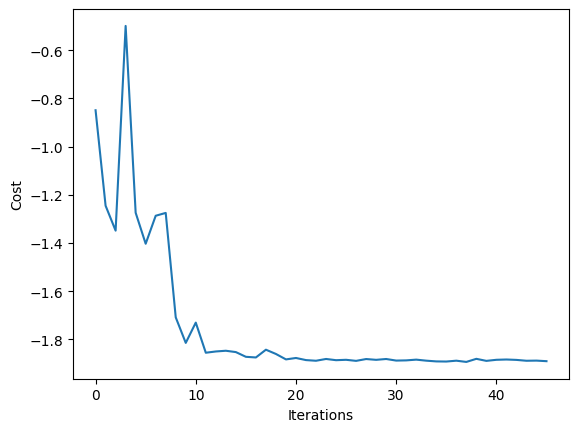

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"] )
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

print(cost_history_dict['iters'])




In [ ]:
distances = np.arange(0.05, 1.5, 0.05)


final_energies_AerSim = []
for d in distances:
    driver = PySCFDriver(atom=f"H 0 0 0; H 0 0 {d}", basis="sto-3g")
    problem = driver.run()

    mapper = JordanWignerMapper()


    hamiltonian = problem.hamiltonian.second_q_op()
    pauli_hamiltonian = mapper.map(hamiltonian)


#then we generate the Ansatz
    init_state = HartreeFock(problem.num_spatial_orbitals,
                         problem.num_particles,
                         mapper)

    ansatz = UCCSD(problem.num_spatial_orbitals,
               problem.num_particles,
               mapper,
               initial_state= init_state)
    
    #initial point x0

    x0 = 2 * np.pi * np.random.random(ansatz.num_parameters)
    

    cost_history_list = []
    res_list = []

    res = minimize(
    cost_func,
    x0,
    args=(ansatz, 
          ansatz, 
          pauli_hamiltonian, 
          estimado, 
          pass_manager, 
          cost_history_dict, 
          True),
    method= 'cobyla',
    options={'maxiter' : 400}
    )

    final_energy = cost_history_dict["cost_history"][-1]

    final_energies_AerSim.append(final_energy)


6862


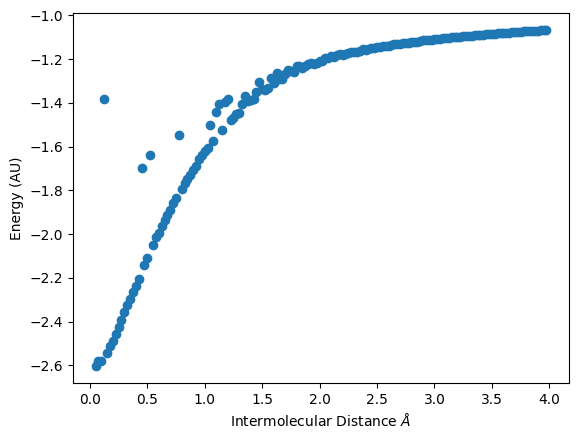

In [ ]:
fig, ax = plt.subplots()
ax.scatter(distances, final_energies_AerSim)
ax.set_xlabel(r'Intermolecular Distance $\AA$')
ax.set_ylabel(r'Energy (AU)')
plt.draw()

print(cost_history_dict['iters'])
